In [1]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

In [2]:
df = pd.read_csv('all_data.csv')

# lets rename Life expectancy at birth (years)
df.rename(columns= {'Life expectancy at birth (years)' : 'life_exp'}, inplace=True)
df.head()

,Country,Year,life_exp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Country   96 non-null     object 
 1   Year      96 non-null     int64  
 2   life_exp  96 non-null     float64
 3   GDP       96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Can see there is no missing data in the dataset and the data types are correctly loaded

In [52]:
df.describe()

,Year,life_exp,GDP,log_GDP
count,96.000000,96.000000,9.600000e+01,96.000000
mean,2007.500000,72.789583,3.880499e+12,27.352684
std,4.633971,10.672882,5.197561e+12,2.504063
min,2000.000000,44.300000,4.415703e+09,22.208433
25%,2003.750000,74.475000,1.733018e+11,25.878295
50%,2007.500000,76.750000,1.280220e+12,27.877952
75%,2011.250000,78.900000,4.067510e+12,29.031362
max,2015.000000,81.000000,1.810000e+13,30.526933


In [5]:
# number of unique countries
print(f'There are {df.Country.nunique()} countries in the dataset')

df.Country.unique().tolist()

There are 6 countries in the dataset


['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

In [6]:
# range of years
print(f'Range of {df.Year.nunique()} years')

df.Year.min(), df.Year.max()

Range of 16 years


(2000, 2015)

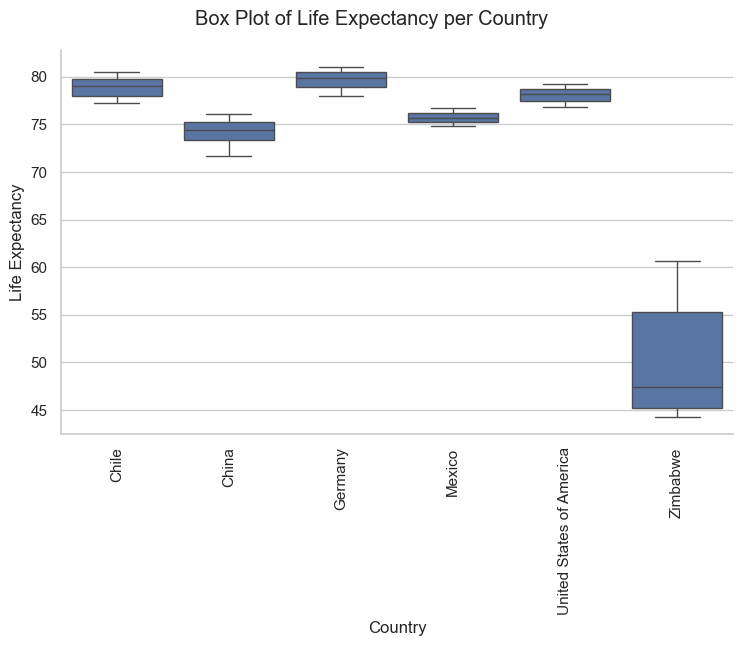

In [82]:
# Lets look at the distribution of life expectancy per country
g = sns.catplot(x = 'Country', y = 'life_exp', data = df, kind = 'box', height = 5, aspect = 1.5)
g.fig.suptitle("Box Plot of Life Expectancy per Country", ha = 'center')
g.set_axis_labels("Country", "Life Expectancy")
plt.xticks(rotation = 90)

g.fig.subplots_adjust(top = 0.9)

plt.show()

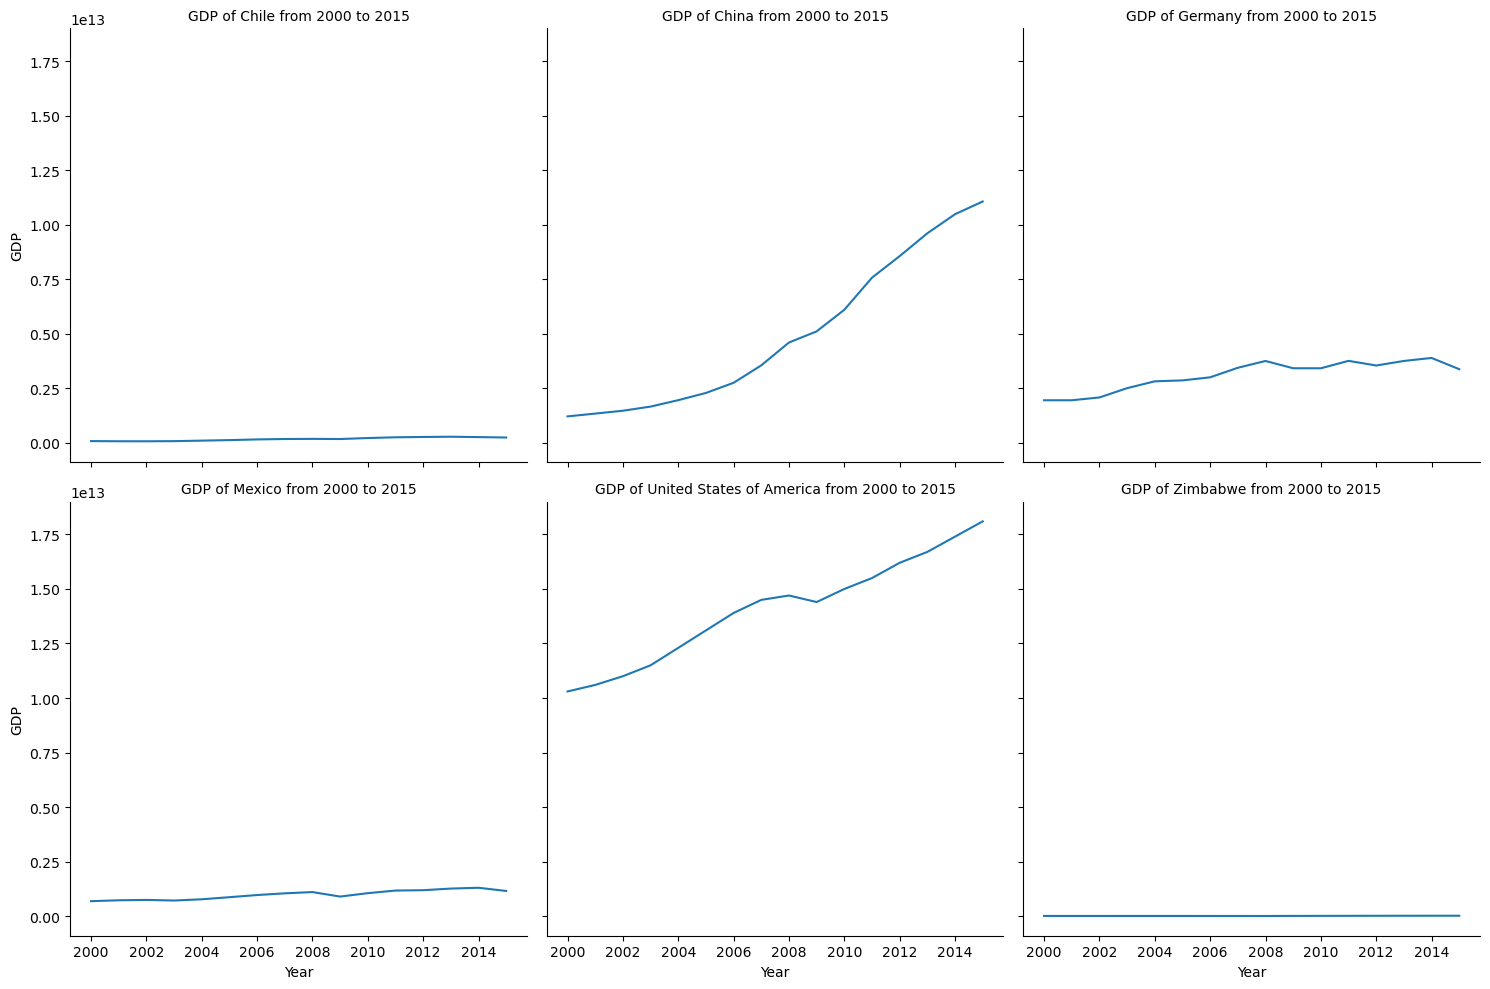

In [7]:
# Lets get an idea of how the GDP has increased for each country over time
g = sns.relplot(x = 'Year', y = 'GDP', data = df, kind = 'line', col = 'Country', col_wrap = 3)

g.set_titles(col_template= 'GDP of {col_name} from 2000 to 2015')
g.fig.tight_layout()

plt.show()

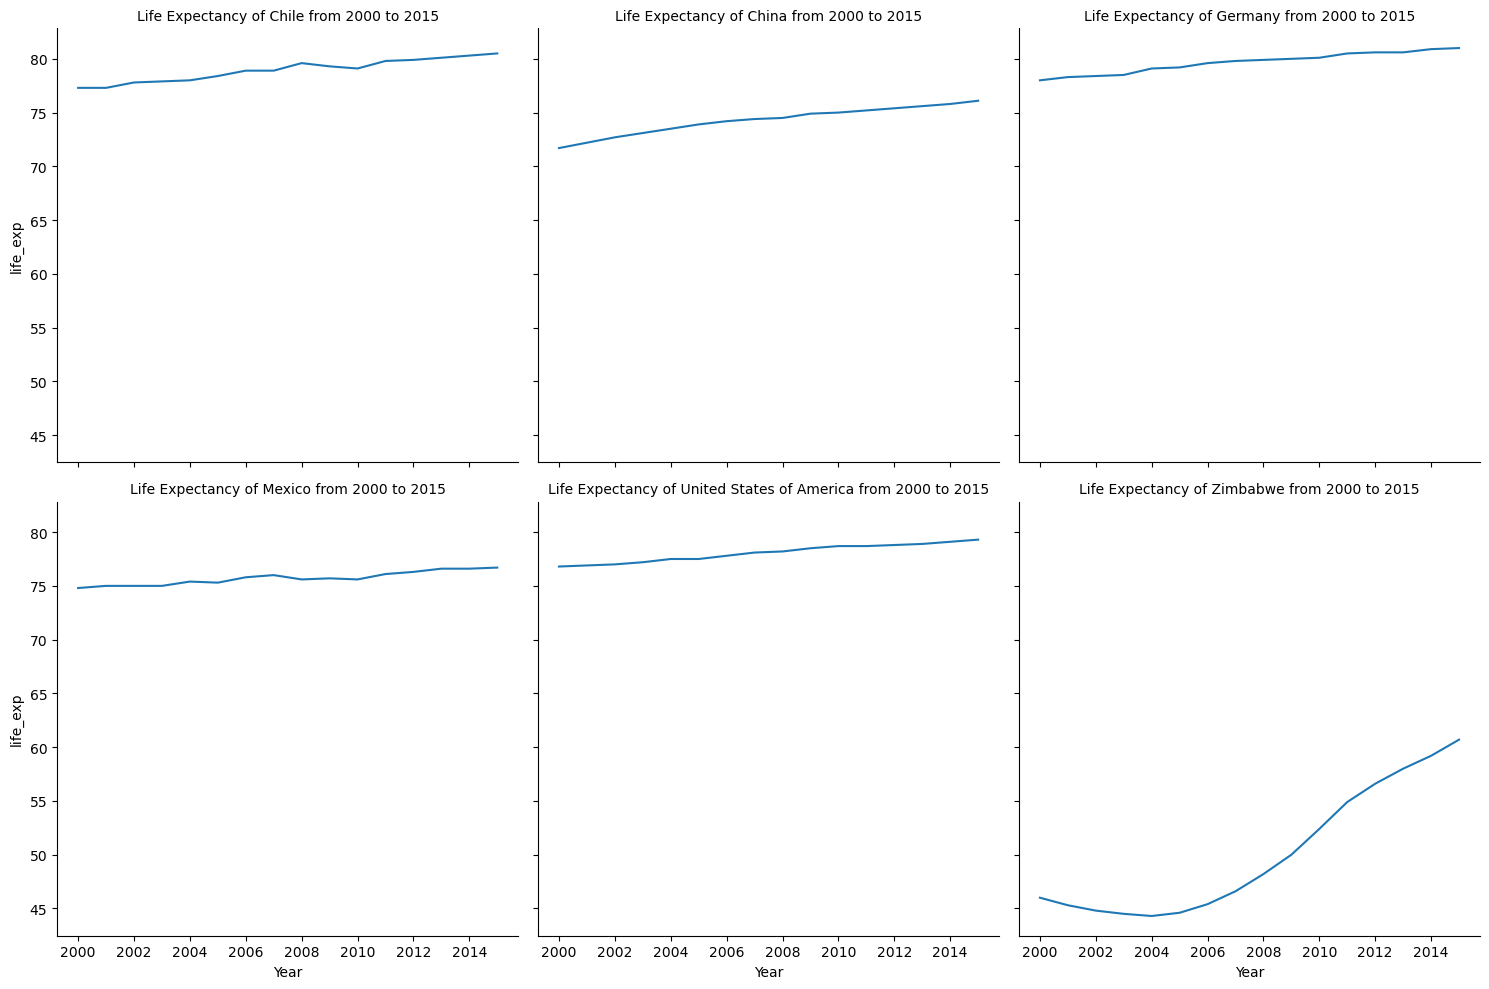

In [8]:
# Lets get an idea of how the Life Expectancy has increased for each country over time
g = sns.relplot(x = 'Year', y = 'life_exp', data = df, kind = 'line', col = 'Country', col_wrap = 3)

g.set_titles(col_template= 'Life Expectancy of {col_name} from 2000 to 2015')
g.fig.tight_layout()

plt.show()

The scales of the y axis for the plots are not similar 

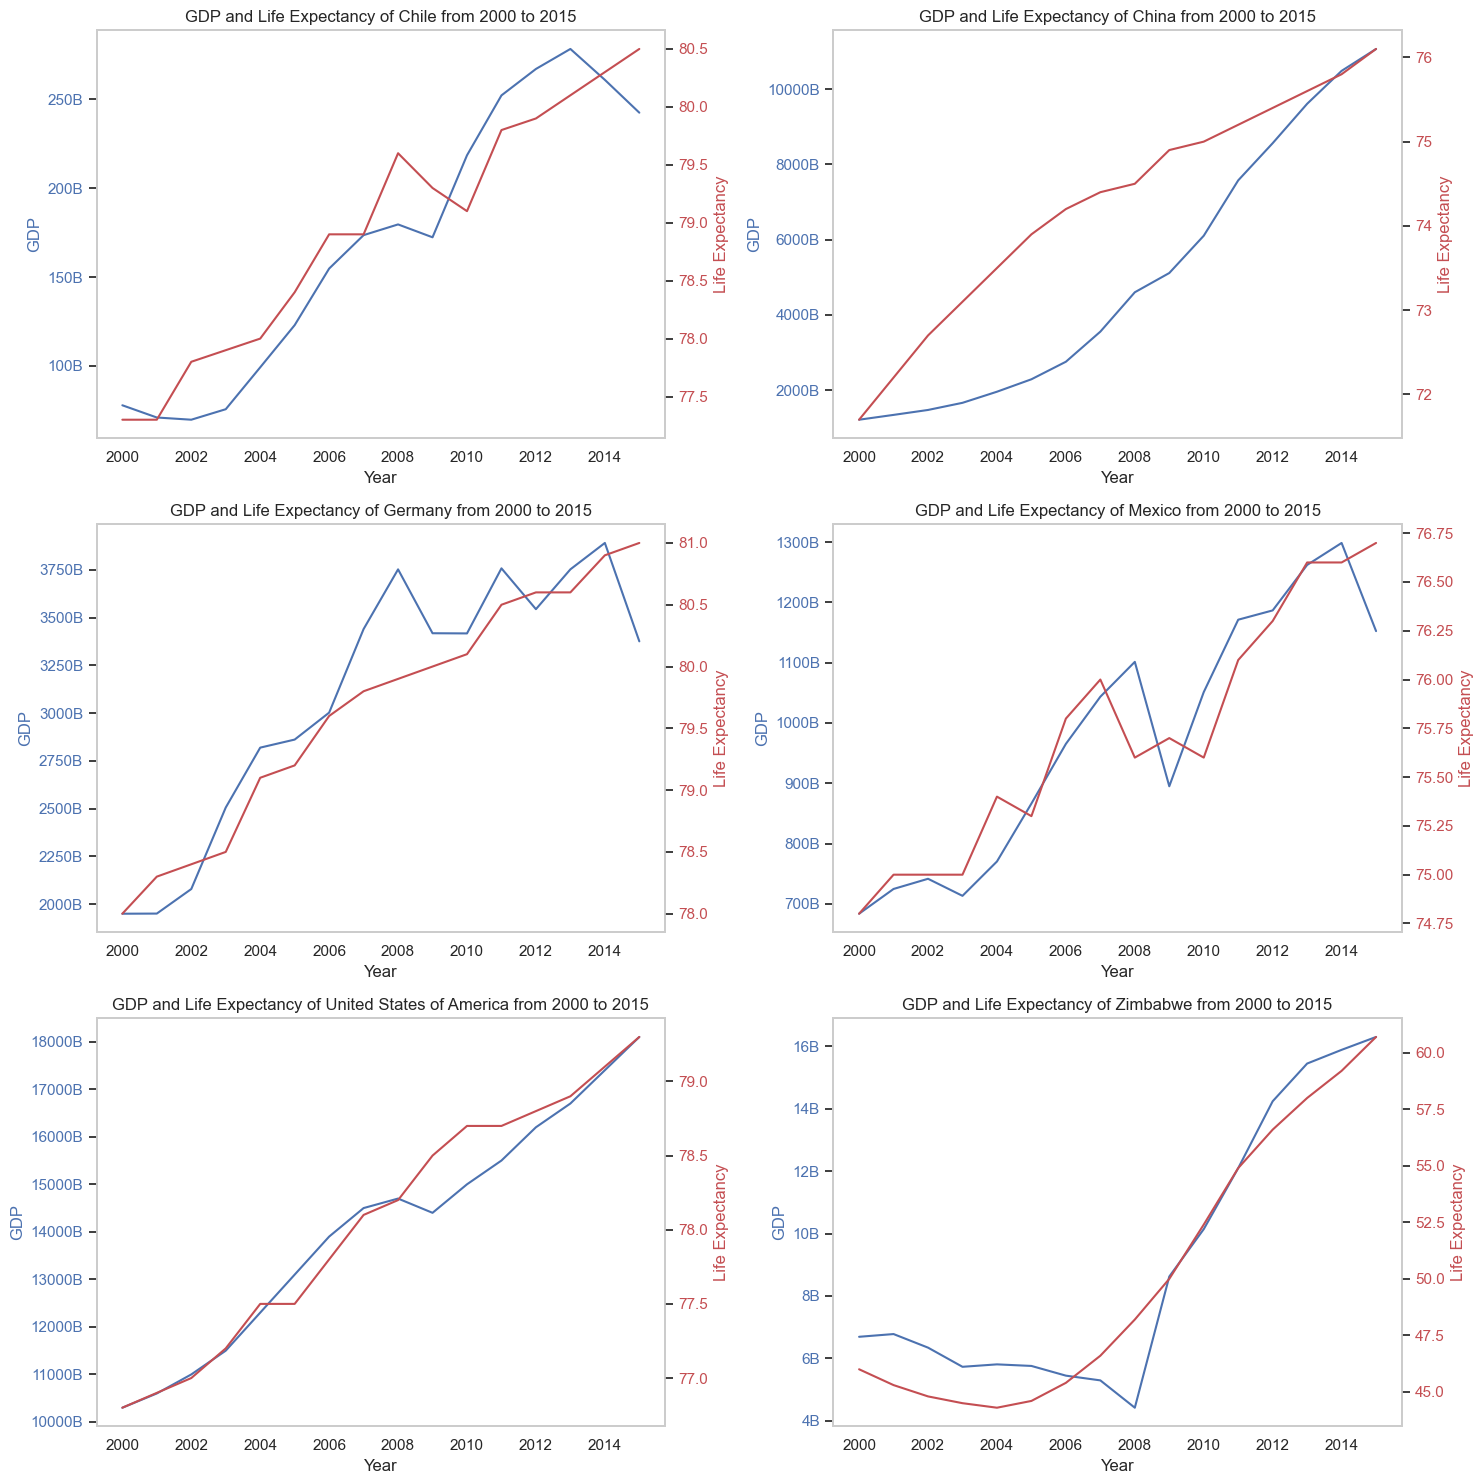

In [9]:
# Set up the plot
sns.set(style="whitegrid")

unique_countries = df['Country'].unique()
num_countries = len(unique_countries)

# number of rows and columns
num_cols = 2
num_rows = 3

# Create a subplot for each country in a grid layout
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Flatten the array to easily iterate over it

def billions_formatter(x, pos):
    """The two args are the value and tick position."""
    return '%1.0fB' % (x * 1e-9)

for ax, country in zip(axes, unique_countries):
    # isolate for the country
    country_data = df[df['Country'] == country]

    # Plot GDP
    ax.plot(country_data['Year'], country_data['GDP'], color='b', label='GDP')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP', color='b')
    ax.tick_params(axis='y', labelcolor='b')
    ax.yaxis.set_major_formatter(ticker.FuncFormatter(billions_formatter))  # Apply custom formatter

    # Create a second y-axis to plot life expectancy
    ax2 = ax.twinx()
    ax2.plot(country_data['Year'], country_data['life_exp'], color='r', label='Life Expectancy')
    ax2.set_ylabel('Life Expectancy', color='r')
    ax2.tick_params(axis='y', labelcolor='r')
    
    # turn off the gridlines
    ax.grid(False)
    ax2.grid(False)
    
    # set the title
    ax.set_title(f'GDP and Life Expectancy of {country} from 2000 to 2015')

fig.tight_layout()
plt.show()

We can see China and the USA GDPs have increased the most (biggest slopes) out of the 6 countries over the past 15 years.

Countries like Zimbabw, Chile, and Mexico have had a flat increased (slope close to 0)

Germany had a slightly increasing gdp (low slope) around 2000 to 2006 then become stagnant and in some periods of time, negative.

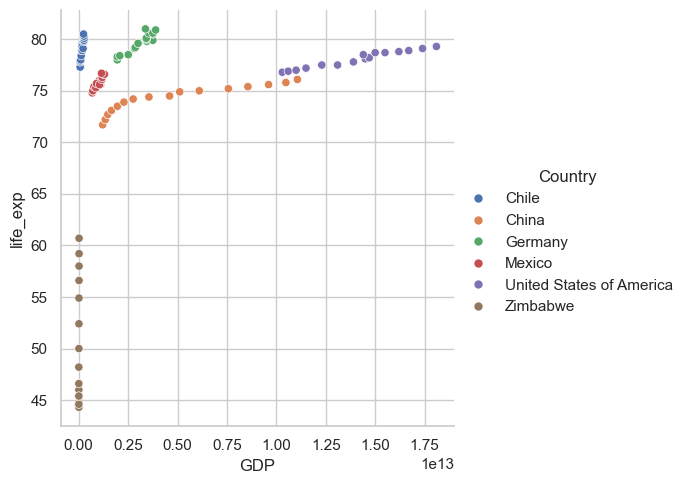

In [11]:
# lets look at the relationship between GDP and Life Expectancy

sns.relplot(x = 'GDP', y = 'life_exp', kind = 'scatter', hue = 'Country', data = df)

plt.show()

For Chile and Zimbabwe, there appears to be no correlation/association between GDP and Life Expectancy. For coutnries such as Germany and Mexico, there appears to be a strong linear positive correlation. For the other countries there appears to be a weak postiive association.

However we need to be aware that for zimbabwe the scale is not similar and thus lets zoom in on it

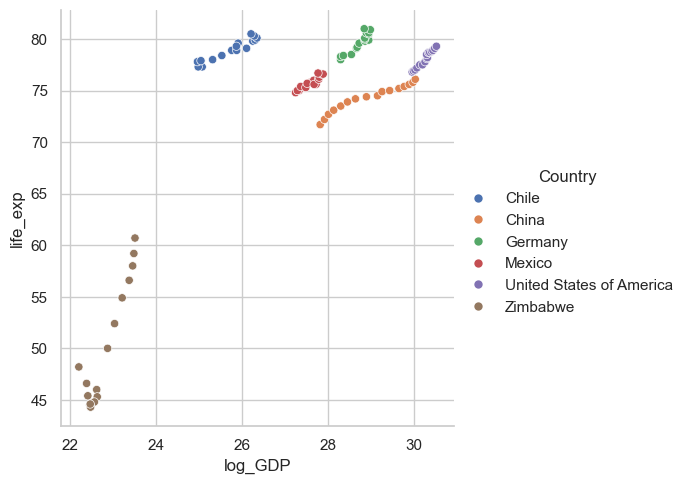

In [41]:
# lets do a log transformation
df['log_GDP'] = df['GDP'].apply(np.log)
sns.relplot(x = 'log_GDP', y = 'life_exp', kind = 'scatter', hue = 'Country', data = df)
    
plt.show()

We can see on a log scale, the correlation between life_exp and GDP is more expressed.

<Figure size 1500x600 with 0 Axes>

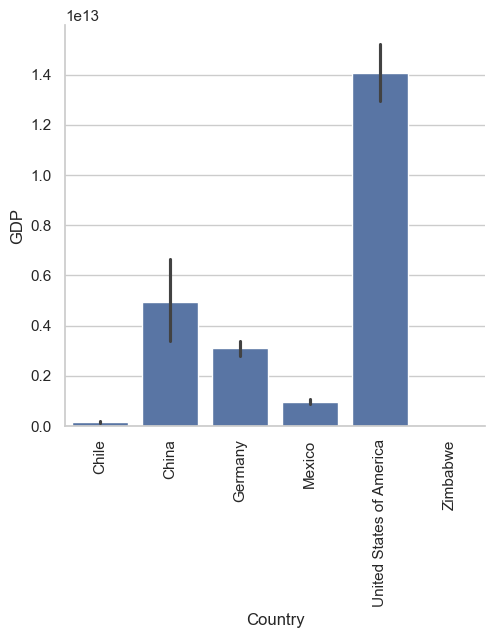

In [45]:
# lets see the differences in gdp per country

plt.figure(figsize=(15, 6))
sns.catplot(x = 'Country', y = 'GDP', data = df, kind = 'bar')
plt.xticks(rotation = 90)

plt.show();

## Conclusions

From the line plots showing GDP and Life Expectancy, we can see that they have an association. Over the range of years 2000 to 2015, we can see that GDP and Life Expectancy has increased, and seem to have a positive correlation with each other. With the scatter plots, using a log transformation on GDP (as the countries differences in GDP are quite on different scales -> we can see that the standard deviation which speaks to the spread of GDP to be 5.2e12)

We should remember that correlation is not causation. GDP and Life Expectancy could be linked possibly or there could be either confoundings, mediators, and colliders in the causal design. Possbily theres a variable that causes GDP and Life Expectancy to increase. Possibly it could be the component of time itself, with modern medicine increasing and the world economy growing it could be seen that GDP and Life expectancy just grow over time.